1. Load & Basic EDA 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('penguins.csv')
print(df.shape)

(344, 7)


First 5 rows :

In [2]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


show the data types and the missing values :

In [3]:
print("\nData Types and Missing Values:")
print(df.info())


Data Types and Missing Values:
<class 'pandas.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    str    
 1   island             344 non-null    str    
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    str    
dtypes: float64(4), str(3)
memory usage: 18.9 KB
None


2. Data Cleaning

In [4]:
print("\n--- Missing Values Before Cleaning ---")
print(df.isnull().sum())

# 1. Drop rows where essential measurements are missing
# This removes the 2 rows we found in Step 1 that had no bill or flipper data.
df_clean = df.dropna(subset=['bill_length_mm', 'flipper_length_mm'])

# 2. Fill missing values in the 'sex' column with 'Unknown'
# This handles the 11 missing values without deleting the whole row.
df_clean['sex'] = df_clean['sex'].fillna('Unknown')

# 3. Verify cleaning results 
print("Missing values per column after cleaning:")
print(df_clean.isnull().sum())

# 4. Check the species distribution to ensure data balance
print("\nFinal species counts:")
print(df_clean['species'].value_counts())


--- Missing Values Before Cleaning ---
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Missing values per column after cleaning:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Final species counts:
species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


3. Create a 2x2 subplot grid with a specific size

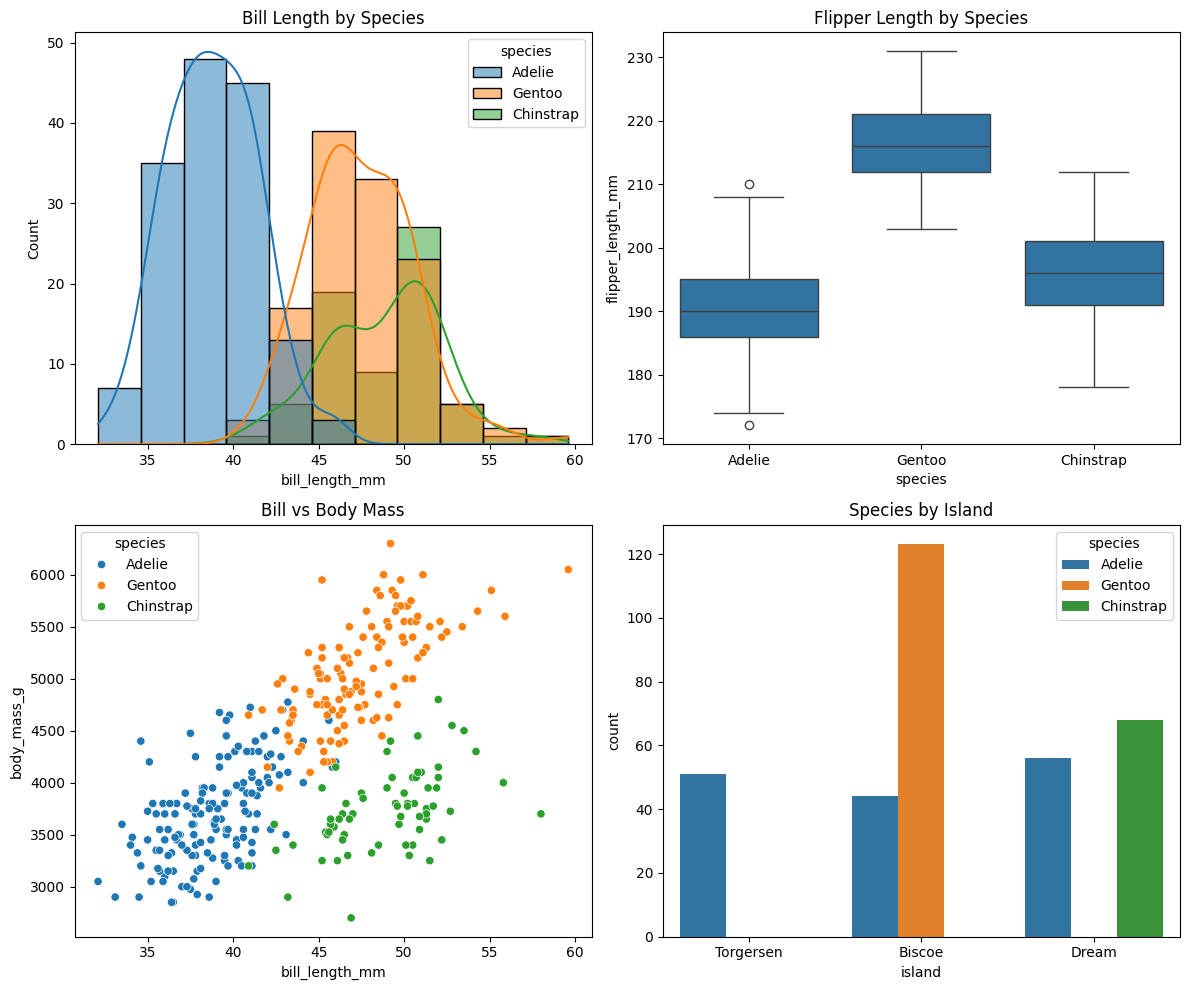

In [5]:
# figsize=(12, 10) ensures the plots are large enough to read
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# A) Histogram: distribution of bill length by species
sns.histplot(data=df_clean, x='bill_length_mm', hue='species', kde=True, ax=ax[0,0]) 
ax[0,0].set_title('Bill Length by Species')

# B) Boxplot: flipper length distribution across species
sns.boxplot(data=df_clean, x='species', y='flipper_length_mm', ax=ax[0,1]) 
ax[0,1].set_title('Flipper Length by Species')

# C) Scatterplot: relationship between bill length and body mass
sns.scatterplot(data=df_clean, x='bill_length_mm', y='body_mass_g', hue='species', ax=ax[1,0])
ax[1,0].set_title('Bill vs Body Mass')

# D) Countplot: number of species found on each island
sns.countplot(data=df_clean, x='island', hue='species', ax=ax[1,1])
ax[1,1].set_title('Species by Island')

# Adjust the padding between plots
plt.tight_layout()
plt.show()